In [9]:
import os

In [10]:
import pdfplumber
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
# 1) Open the PDF
with pdfplumber.open("table.pdf") as pdf:
    # grab page 1 (zero-based index)
    page = pdf.pages[0]
    
    # 2) Extract the table
    #    this returns a list of rows, each row is a list of cell-strings
    table = page.extract_table()

# 3) Turn it into a DataFrame (skip malformed rows if needed)
#    table[0] is the header row: ["q", "p"]
df = pd.DataFrame(table[1:], columns=table[0])

# 4) Convert strings → numbers and into a NumPy array
df = df.astype(float)      # will convert "17" → 17.0, "4.1" → 4.1, etc.
arr = df.values            # shape (n_rows, 2)

p_mean = df["p"].mean()
q_mean = df["q"].mean()

p_mean = round(p_mean,2)
q_mean = round(q_mean,2)

print("The mean value of p is " + str(p_mean) + ". The mean value of q is " + str(q_mean))


CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


The mean value of p is 5.4. The mean value of q is 14.52


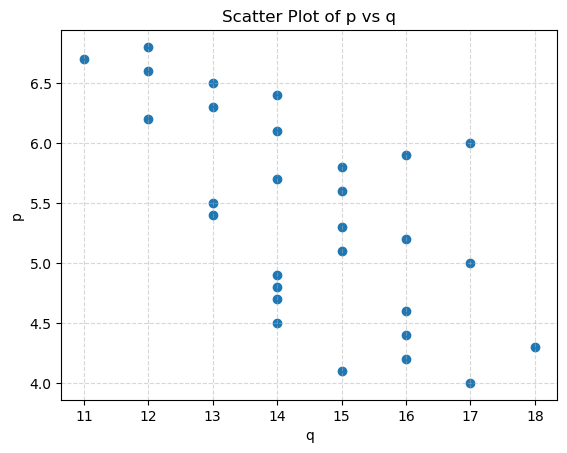

In [11]:
####Assignment 2

# 3) Pull out q and p as NumPy arrays
q = df["q"].values
p = df["p"].values


# 4) Plot scatter of p vs q
plt.scatter(q, p)
plt.xlabel("q")
plt.ylabel("p")
plt.title("Scatter Plot of p vs q")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

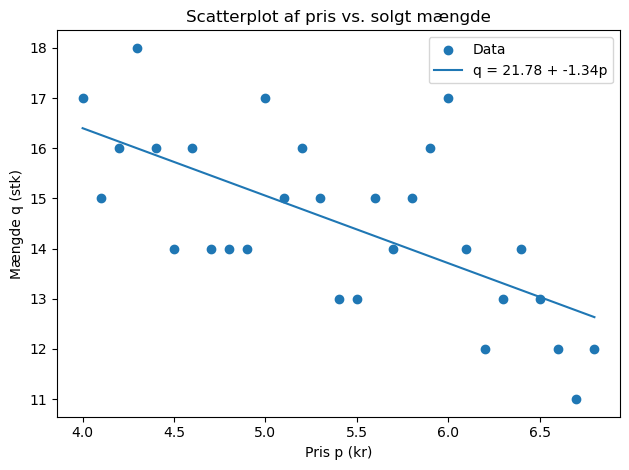

Efterspørgselsfunktion: q = 21.78 + -1.34·p
Profitmaksimerende pris: 9.10 kr


In [12]:
######Assignment 3


# 2) Scatter-plot og lineær tilpasning
slope, intercept = np.polyfit(p, q, 1)  # q ≈ slope*p + intercept
a = intercept
b = slope

plt.figure()
plt.scatter(p, q, label='Data')

#Here we plot the fitted line
x_line = np.linspace(p.min(), p.max(), 100)
plt.plot(x_line, a + b*x_line, label=f"q = {a:.2f} + {b:.2f}p")


#giving specific labels to the axes


plt.xlabel('Pris p (kr)')
plt.ylabel('Mængde q (stk)')
plt.title('Scatterplot af pris vs. solgt mængde')
plt.legend()
plt.tight_layout()
plt.show()



# 3) Now we profit makimazing, we have the cost function
# C(q) = 2q

c = 2  # enhedsomkostning per agurk

#thereby the profit function is
# π(q) = p(q) * q - C(q)



p_opt = (b*c - a) / (2*b)


print(f"Efterspørgselsfunktion: q = {a:.2f} + {b:.2f}·p")
print(f"Profitmaksimerende pris: {p_opt:.2f} kr")




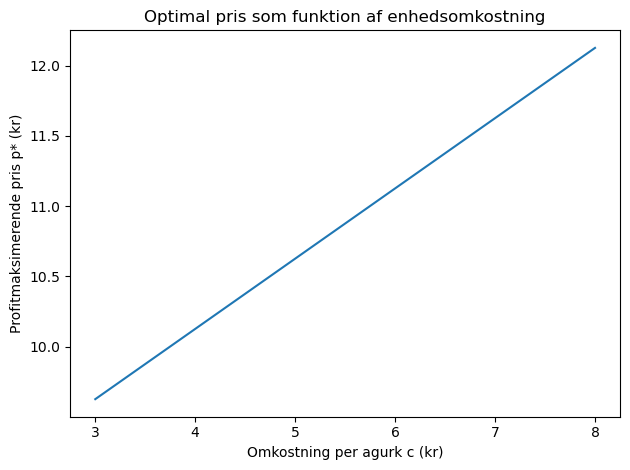

In [8]:
## Opgave 4. 


# Efterspørgselsparametre fra tidligere lineær fit
a = 21.78
b = -1.34

# Interval for omkostninger
c_values = np.linspace(3, 8, 100)
# Profitmaksimerende pris som funktion af omkostning
p_opt = (b * c_values - a) / (2 * b)

# Plot
plt.figure()
plt.plot(c_values, p_opt)
plt.xlabel('Omkostning per agurk c (kr)')
plt.ylabel('Profitmaksimerende pris p* (kr)')
plt.title('Optimal pris som funktion af enhedsomkostning')
plt.tight_layout()
plt.show()
